In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops

from skimage import data


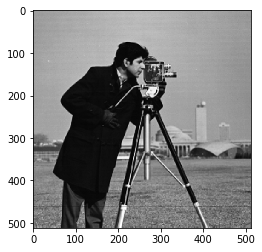

In [2]:
PATCH_SIZE = 21

# open the camera image
image = data.camera()

plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=255)

plt.show()

In [3]:
# select some patches from grassy areas of the image
grass_locations = [(474, 291), (440, 433), (466, 18), (462, 236)]

grass_patches = []

for loc in grass_locations:
    grass_patches.append(image[loc[0] : loc[0] + PATCH_SIZE,
                               loc[1] : loc[1] + PATCH_SIZE])

print(len(grass_patches))
#print(grass_patches[1])

#select some patches from sky areas of the image
sky_locations = [(54, 48), (21, 233), (90, 380), (195, 330)]
sky_patches = []

for loc in sky_locations:
    sky_patches.append(image[loc[0] : loc[0] + PATCH_SIZE,
                             loc[1] : loc[1] + PATCH_SIZE])

4


In [4]:
# http://scikit-image.org/docs/0.7.0/api/skimage.feature.texture.html

# compute some GLCM properties on each grass patch
grass_f1 = []
grass_f2 = []

for patch in (grass_patches):
    print(patch.shape)
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    grass_f1.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    grass_f2.append(greycoprops(glcm, 'correlation')[0, 0])

(21, 21)
(21, 21)
(21, 21)
(21, 21)


In [5]:
# compute some GLCM properties on each sky patch
sky_f1 = []
sky_f2 = []

for patch in (sky_patches):
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    sky_f1.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    sky_f2.append(greycoprops(glcm, 'correlation')[0, 0])

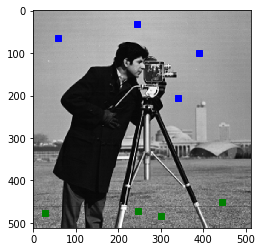

In [6]:
# display original image with locations of patches
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest',
          vmin=0, vmax=255)

for (y, x) in grass_locations:
    plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
    
for (y, x) in sky_locations:
    plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')

plt.show()

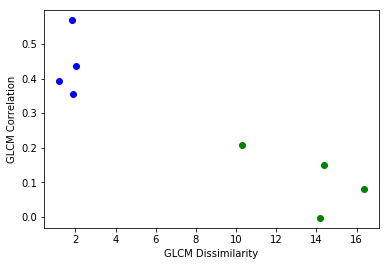

In [7]:
# for each patch, plot (dissimilarity, correlation)
plt.plot(grass_f1[:len(grass_patches)], grass_f2[:len(grass_patches)], 'go',
        label='Grass')

plt.plot(sky_f1[:len(sky_patches)], sky_f2[:len(sky_patches)], 'bo',
        label='Sky')

plt.xlabel('GLCM Dissimilarity')
plt.ylabel('GLCM Correlation')

plt.show()

In [8]:
print(sky_f2)

[0.5685901143271829, 0.3543098150256299, 0.4356752062819438, 0.39351203630290665]


In [9]:
print(grass_f2)

[-0.00322167261091869, 0.2086012963477699, 0.14949334093222794, 0.08021824725244109]
